# Animação pêndulo

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def rk4vec( t0, m, u0, dt, f ):
    
    f0 = f ( t0, m, u0 )
    t1 = t0 + dt / 2.0
    u1 = np.zeros ( m )
    u1[0:m] = u0[0:m] + dt * f0[0:m] / 2.0
    f1 = f ( t1, m, u1 )
    
    t2 = t0 + dt / 2.0
    u2 = np.zeros ( m )
    u2[0:m] = u0[0:m] + dt * f1[0:m] / 2.0
    f2 = f ( t2, m, u2 )
    
    t3 = t0 + dt
    u3 = np.zeros ( m )
    u3[0:m] = u0[0:m] + dt * f2[0:m]
    f3 = f ( t3, m, u3 )
    
    u = np.zeros ( m )
    u[0:m] = u0[0:m] + ( dt / 6.0 ) * ( \
                                       f0[0:m] \
                                       + 2.0 * f1[0:m] \
                                       + 2.0 * f2[0:m] \
                                       +       f3[0:m] )
    return u

In [3]:
def pendulo(angle=10.):
    tmin = 0.
    tmax = 10.*np.pi
    n = 200
    m = 2
    #tempo
    t = np.linspace(tmin,tmax,n)
    dt = t[1] - t[0]
    #variaveis
    
    #u0[0] = theta
    #u0[1] = v
    
    u0 = np.zeros([m])
    u1 = np.zeros_like(u0)
    
    theta = np.zeros([n])
    v = np.zeros([n])
    
    angle = angle*np.pi/180.
    
    #condicoes iniciais
    u0[0] = angle
    u0[1] = 0.
    
    #evoluir no tempo
    for i in range(n):
        theta[i] = u0[0]
        v[i]     = u0[1]
        
        u1 = rk4vec( t[i], m, u0, dt, pend_f)
    
        u0 = np.copy(u1)
    
    return theta, v, t



In [4]:
def pend_f(t,m,u):
    
    uprime = np.zeros_like(u)
    
    Q = 10.
    w = 2./3.
    A = 0.
    
    uprime[0] =  u[1]
    uprime[1] = -u[1]/Q - np.sin(u[0]) + A*np.cos(w*t)
    
    return uprime

In [5]:
theta,v,t = pendulo(angle = 10.)

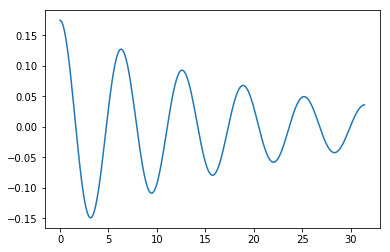

In [6]:
plt.plot(t,theta)

In [7]:
L=1
x=np.sin(theta)*L
y=-np.cos(theta)*L

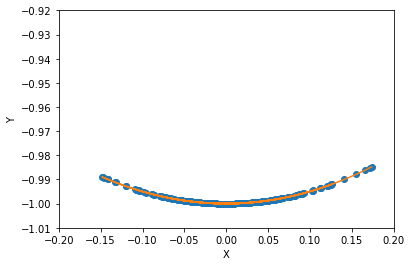

In [8]:
from IPython import display
import time

for i in range(200):
    plt.xlim(-0.20,0.20)
    plt.ylim(-1.01,-0.92)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(y[i],x[i],'o',markersize=10)
    plt.plot(x[0:i],y[0:i])
    plt.scatter(x[0:i],y[0:i])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf().clear()
    time.sleep(0.1)

